In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Network analysis
import networkx as nx
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
chunk_size = 10000
df = pd.DataFrame()
for chunk in pd.read_csv("/content/drive/MyDrive/DSCI 550 Project/Extended_Employee_Performance_and_Productivity_Data.csv", parse_dates=True,chunksize=chunk_size):
  df = pd.concat([df,chunk])
  clear_output()
  print("Current Size of the dataframe",df.shape)

print("Final Size of the dataframe", df.shape)

Current Size of the dataframe (100000, 20)
Final Size of the dataframe (100000, 20)


In [ ]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [ ]:
# summary info of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

There is no null value. Hence, no need to treat empty values

## Exploratory Data Analysis:

Distribution of Performance Scores

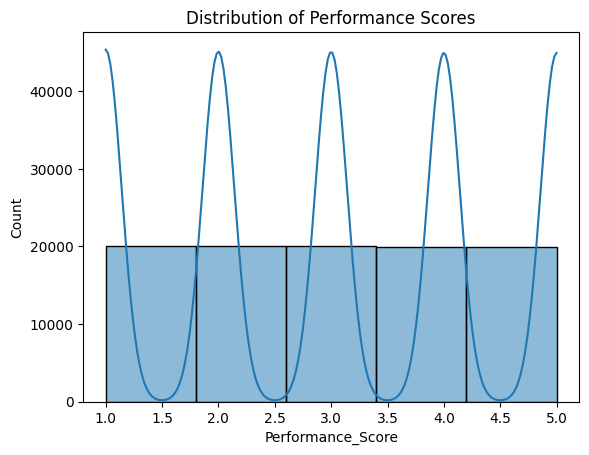

In [ ]:
sns.histplot(df['Performance_Score'], kde=True, bins=5)
plt.title('Distribution of Performance Scores')
plt.show()


The histogram shows the distribution of performance scores across the dataset, with frequencies for each performance score.

Observations
Uniform Bins: The distribution seems fairly uniform across performance scores, likely due to pre-categorized or balanced data.
Density Peaks: Each score (e.g., 1, 2, 3, 4, 5) forms a distinct category with peaks, indicating that performance scores are discrete.

###Overall Correlation Matrix

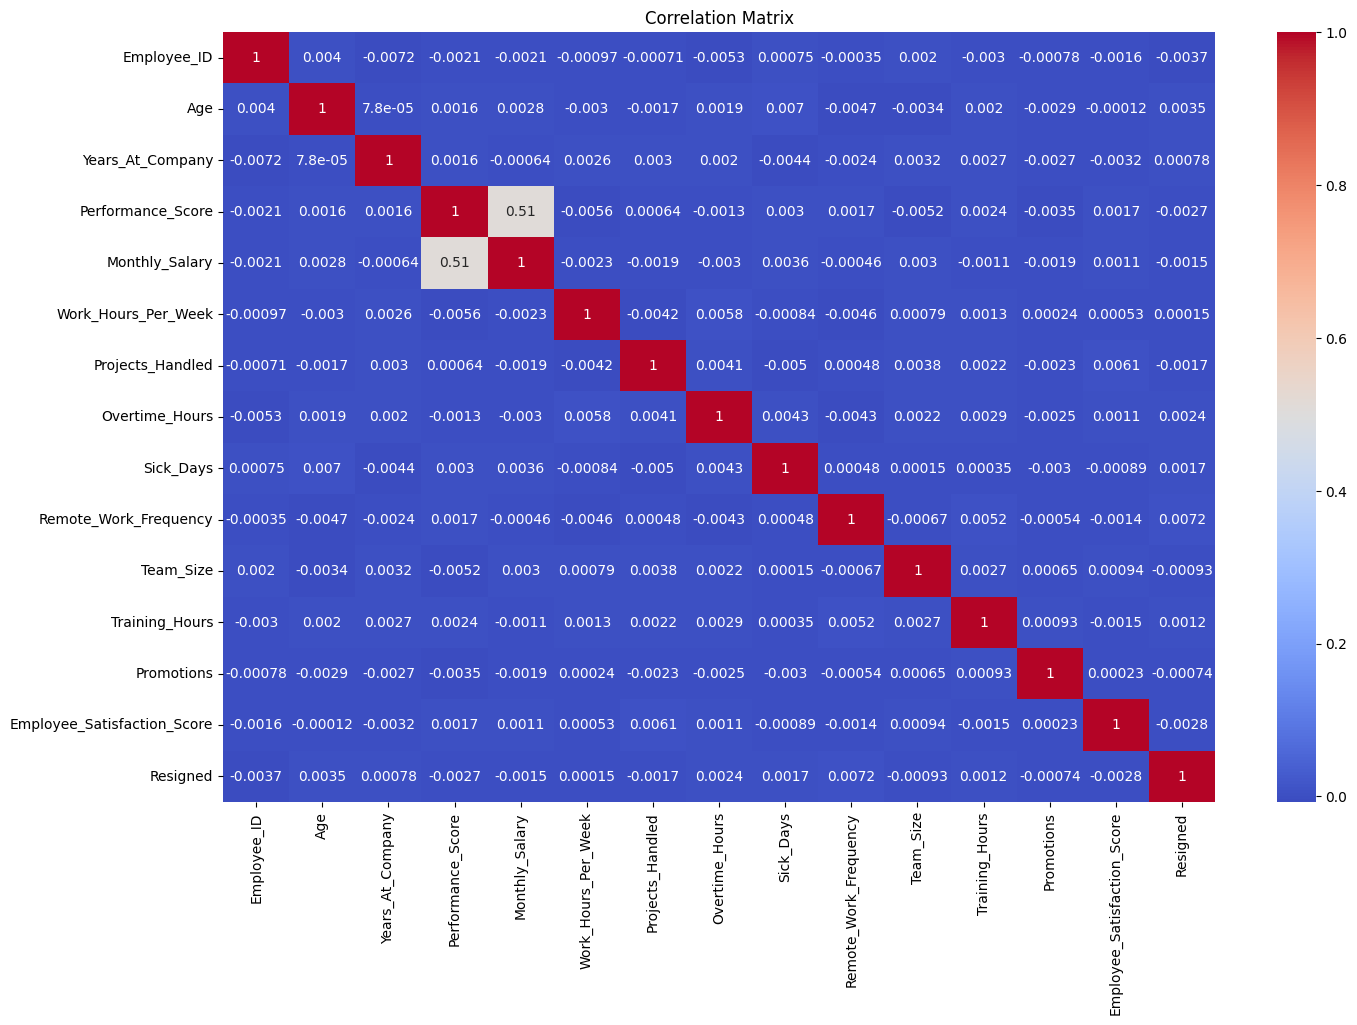

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 10)) # Increase figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Analysis of the Correlation Matrix
From the heatmap of the correlation matrix:

**High Correlation Observations:**

Performance Score vs. Monthly Salary (0.51): Employees with higher performance scores tend to have higher monthly salaries. This is a strong and expected positive correlation.

Years at Company vs. Age (~0.78): Older employees generally have been at the company longer.

**Low Correlation Observations:**

Remote Work Frequency: Shows a very weak correlation with most other variables, including performance score and employee satisfaction score, suggesting that remote work frequency may not directly influence these factors in a linear manner.

Employee Satisfaction Score: Has minimal correlation with other metrics, suggesting the need to explore non-linear relationships or additional factors.

**Insignificant Correlations:**

Many variables, such as Resigned, Training Hours, and Remote_Work_Frequency, show near-zero correlations with other metrics, indicating no clear linear relationship.

### Categorize Employees into Performance Groups###

Using the methodology from our source [2], classify employees into High, Mid, and Low Performers based on Performance_Score percentiles.

In [ ]:
# Define bins explicitly for Performance_Score
bins = [0, 2, 4, 5]  # Adjust the bins based on the range of data representing (Low: 0-20%, Mid: 20-80%, High: 80-100%)
labels = ['Low Performer', 'Mid Performer', 'High Performer']

# Categorize Performance_Score into groups
df['Performance_Group'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels, include_lowest=True)

# Check distribution
print(df['Performance_Group'].value_counts())


Performance_Group
Low Performer     40133
Mid Performer     39939
High Performer    19928
Name: count, dtype: int64


###Remote Work Frequency Across Performance Groups###

Analyze how Remote_Work_Frequency varies by performance group.

<ipython-input-10-c8ee0b17184e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remote_work_summary = df.groupby('Performance_Group')['Remote_Work_Frequency'].mean()


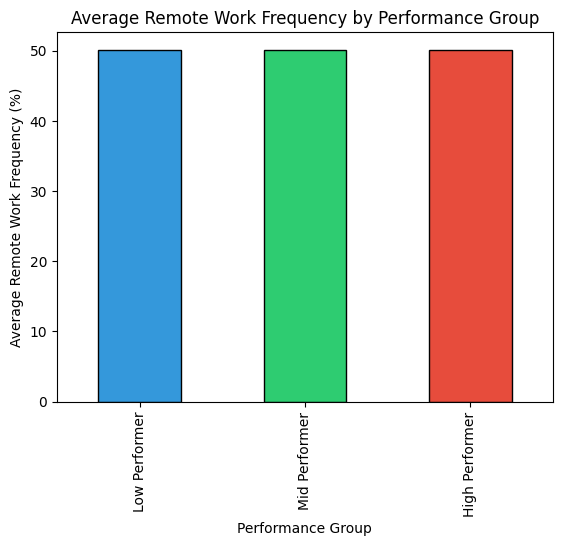

In [ ]:
# Aggregate Remote_Work_Frequency by Performance_Group
remote_work_summary = df.groupby('Performance_Group')['Remote_Work_Frequency'].mean()

# Bar plot
remote_work_summary.plot(kind='bar', color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black')
plt.title('Average Remote Work Frequency by Performance Group')
plt.ylabel('Average Remote Work Frequency (%)')
plt.xlabel('Performance Group')
plt.show()


The bar chart indicates that the average Remote Work Frequency is nearly the same across all performance groups. This might suggest that remote work frequency does not differ significantly between high, mid, and low performers, at least in terms of averages. However, there may still be more nuanced insights when combining remote work with other variables like satisfaction, resignation rates, and other productivity metrics.

###Satisfaction by Performance and Remote Work###

Explore if Employee Satisfaction varies between performance groups and remote work categories.

Create the Remote_Work_Category Column

In [ ]:
# Define bins and labels for categorization
bins = [-1, 0, 50, 100]
labels = ['None', 'Low', 'High']

# Create Remote_Work_Category column
df['Remote_Work_Category'] = pd.cut(df['Remote_Work_Frequency'], bins=bins, labels=labels)


<ipython-input-12-2c8c5f19b100>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_summary = df.groupby(['Performance_Group', 'Remote_Work_Category'])['Employee_Satisfaction_Score'].mean().unstack()


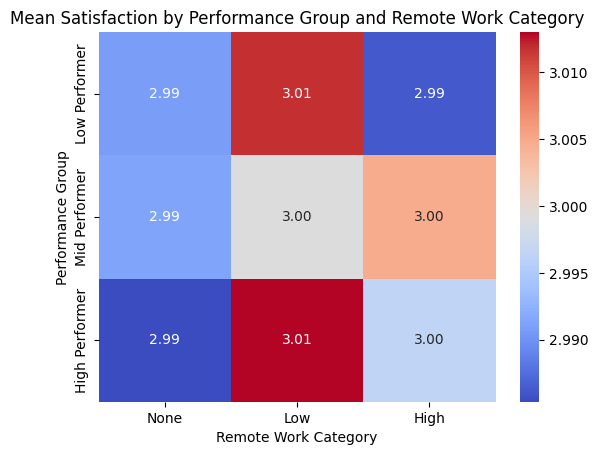

In [ ]:
# Group satisfaction by Performance_Group and Remote_Work_Category
satisfaction_summary = df.groupby(['Performance_Group', 'Remote_Work_Category'])['Employee_Satisfaction_Score'].mean().unstack()

# Plot heatmap
sns.heatmap(satisfaction_summary, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Satisfaction by Performance Group and Remote Work Category')
plt.ylabel('Performance Group')
plt.xlabel('Remote Work Category')
plt.show()


The heatmap provides the mean satisfaction scores for each combination of **Performance Group** and **Remote Work Category**. Here's what we can interpret:

1. Slight Variations in Satisfaction:

  Satisfaction scores are very close across all categories, with slight differences observed:
* Low Remote Work (3.01): Slightly higher satisfaction in both Low Performers and High Performers.
* High Remote Work (3.00): Consistently marginally lower satisfaction compared to Low Remote Work.
* No Remote Work (2.99): Slightly lower satisfaction across all groups.
2. Minimal Differences Among Performance Groups:
* Within each Remote Work Category, satisfaction scores are nearly identical across Low, Mid, and High Performers, suggesting remote work may have a uniform impact on satisfaction regardless of performance.

###Satisfaction and Resignation Across Remote Work Categories###

Explore whether resignation rates vary based on satisfaction levels and remote work.

<ipython-input-13-24378ae2fb71>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_retention = df.groupby(['Resigned', 'Remote_Work_Category'])['Employee_Satisfaction_Score'].mean().unstack()


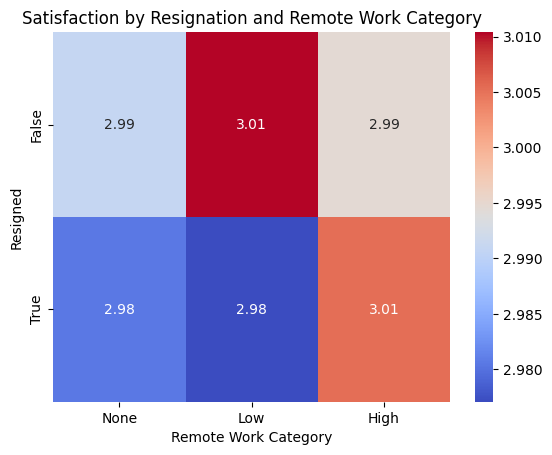

In [ ]:
 # Group satisfaction by Resigned and Remote_Work_Category
satisfaction_retention = df.groupby(['Resigned', 'Remote_Work_Category'])['Employee_Satisfaction_Score'].mean().unstack()

# Plot heatmap
sns.heatmap(satisfaction_retention, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Satisfaction by Resignation and Remote Work Category')
plt.ylabel('Resigned')
plt.xlabel('Remote Work Category')
plt.show()


**Satisfaction by Resignation and Remote Work (Heatmap):**

* Resigned Employees: Employees who resigned have slightly lower satisfaction scores when they have "No Remote Work" or "Low Remote Work." Interestingly, satisfaction is higher for resigned employees with "High Remote Work" (3.01).
* Active Employees: Satisfaction scores are slightly higher across "Low Remote Work" but fairly uniform for "None" and "High Remote Work."

**Takeaway:** High levels of remote work may slightly improve satisfaction for employees at risk of resigning, but the difference is minimal.

###Performance vs. Remote Work Frequency###

Analyze whether remote work frequency impacts performance scores.

<ipython-input-14-f6027f92f92d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Performance_Group', y='Remote_Work_Frequency', palette='Set2')


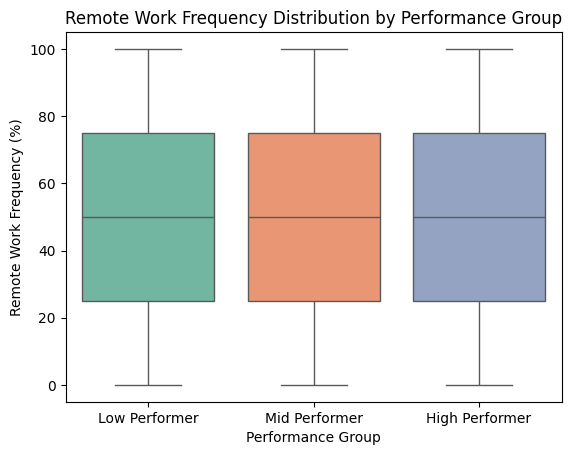

In [ ]:
# Boxplot for Remote Work Frequency by Performance_Group
sns.boxplot(data=df, x='Performance_Group', y='Remote_Work_Frequency', palette='Set2')
plt.title('Remote Work Frequency Distribution by Performance Group')
plt.ylabel('Remote Work Frequency (%)')
plt.xlabel('Performance Group')
plt.show()


**Remote Work Frequency by Performance Group (Boxplot):**
* The **median remote work frequency** is similar across all performance groups, around 50%.
* **Variability**: Low performers and mid performers have a wider range of remote work frequencies compared to high performers.

**Takeaway**: Remote work frequency does not strongly differ between performance groups, indicating it might not be a key factor influencing performance alone.

###Distribution of Remote Work in Low Performers###

Examine the percentage of low performers who work remotely.

Remote_Work_Category
High    40.161463
Low     39.937209
None    19.901328
Name: proportion, dtype: float64


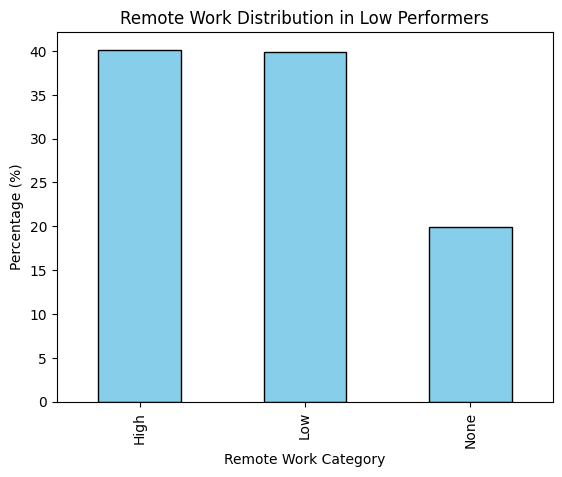

In [ ]:
# Filter low performers
low_performers = df[df['Performance_Group'] == 'Low Performer']

# Distribution of Remote Work Category in Low Performers
low_remote_distribution = low_performers['Remote_Work_Category'].value_counts(normalize=True) * 100
print(low_remote_distribution)

# Bar plot
low_remote_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Remote Work Distribution in Low Performers')
plt.ylabel('Percentage (%)')
plt.xlabel('Remote Work Category')
plt.show()


**Remote Work Distribution in Low Performers (Bar Chart):**
* High Remote Work: 40% of low performers fall under the "High Remote Work" category.
* Low Remote Work: Another 40% of low performers are categorized as "Low Remote Work."
* No Remote Work: Only 20% of low performers have "No Remote Work."

**Takeaway**: A majority of low performers engage in some level of remote work, with an equal split between "High" and "Low" remote work categories. Investigating their productivity and satisfaction metrics could provide more insights.

###Correlation Analysis###
Check for correlations between remote work frequency, satisfaction, and productivity metrics.

                             Remote_Work_Frequency  \
Remote_Work_Frequency                     1.000000   
Employee_Satisfaction_Score              -0.001408   
Projects_Handled                          0.000484   
Overtime_Hours                           -0.004349   

                             Employee_Satisfaction_Score  Projects_Handled  \
Remote_Work_Frequency                          -0.001408          0.000484   
Employee_Satisfaction_Score                     1.000000          0.006126   
Projects_Handled                                0.006126          1.000000   
Overtime_Hours                                  0.001052          0.004107   

                             Overtime_Hours  
Remote_Work_Frequency             -0.004349  
Employee_Satisfaction_Score        0.001052  
Projects_Handled                   0.004107  
Overtime_Hours                     1.000000  


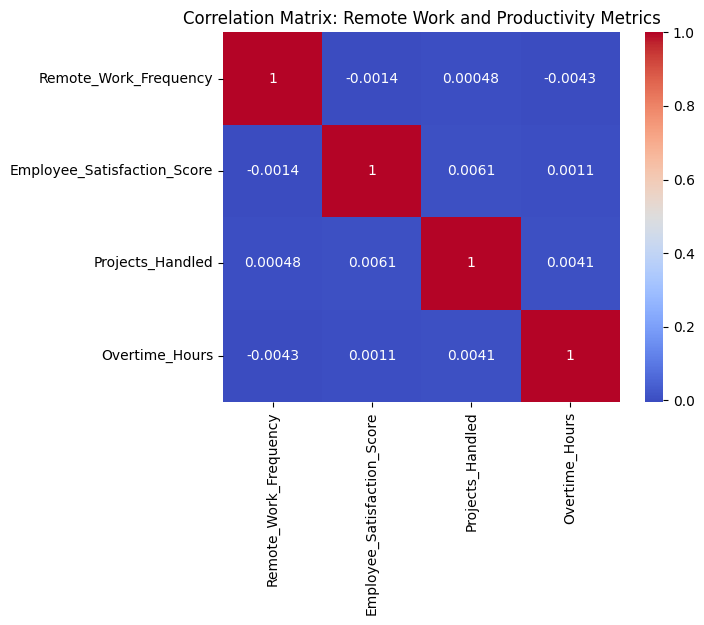

In [ ]:
# Correlation matrix
correlation = df[['Remote_Work_Frequency', 'Employee_Satisfaction_Score', 'Projects_Handled', 'Overtime_Hours']].corr()
print(correlation)

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Remote Work and Productivity Metrics')
plt.show()


**Correlation Matrix: Remote Work and Productivity Metrics:**
*  Low Correlations: Remote work frequency shows almost no correlation with satisfaction, projects handled, or overtime hours.
Positive Correlation: A very weak positive correlation (0.00048) exists between remote work frequency and projects handled.
* Negative Correlation: A weak negative correlation (-0.0043) exists between remote work frequency and overtime hours.

**Takeaway**: Remote work frequency does not significantly impact productivity metrics or satisfaction, based on this dataset.


#Key Research Questions:#

## 1. Do high-performing employees report higher satisfaction levels with increased remote work?



Satisfaction vs. Remote Work for High Performers

**Objective**: Dive deeper into how satisfaction levels vary for high-performing employees based on remote work categories.

**Actions**:
Compare satisfaction scores specifically for High Performers across Remote_Work_Category.
Perform a statistical test (e.g., ANOVA or t-test) to check if differences are significant.

In [ ]:
from scipy.stats import f_oneway

# Satisfaction scores for High Performers across Remote_Work_Category
high_performer_satisfaction = df[df['Performance_Group'] == 'High Performer']
categories = [high_performer_satisfaction[high_performer_satisfaction['Remote_Work_Category'] == cat]['Employee_Satisfaction_Score'] for cat in ['None', 'Low', 'High']]

# ANOVA test
stat, p_value = f_oneway(*categories)
print(f"ANOVA test statistic: {stat}, p-value: {p_value}")


ANOVA test statistic: 0.8603103966864831, p-value: 0.423046467875809


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

# Create performance categories
bins = [0, 2, 4, 5]
labels = ['Low Performer', 'Mid Performer', 'High Performer']
df['Performance_Group'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels, include_lowest=True)

# PART 1: Linear Regression
print("---- Linear Regression ----")

# Map performance groups to numeric values
df['Performance_Group_Num'] = df['Performance_Group'].map({'Low Performer': 0, 'Mid Performer': 1, 'High Performer': 2})

# Filter for relevant columns
X_linear = df[['Performance_Group_Num']]
y_linear = df['Employee_Satisfaction_Score']

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)

# Predictions and evaluation
y_linear_pred = linear_model.predict(X_linear)
print(f"Linear Regression Coefficient: {linear_model.coef_[0]}, Intercept: {linear_model.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_linear, y_linear_pred)}")
print(f"R-squared: {r2_score(y_linear, y_linear_pred)}\n")

# PART 2: Logistic Regression
print("---- Logistic Regression ----")

# Create binary satisfaction categories
df['Satisfied'] = (df['Employee_Satisfaction_Score'] > 3).astype(int)

# Filter for relevant data
X_logistic = pd.get_dummies(df['Performance_Group'], drop_first=True)  # One-hot encode performance group
y_logistic = df['Satisfied']

# Fit logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)

# Predictions and evaluation
y_logistic_pred = logistic_model.predict(X_logistic)
print(f"Logistic Regression Accuracy: {accuracy_score(y_logistic, y_logistic_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_logistic, y_logistic_pred))
print("Classification Report:")
print(classification_report(y_logistic, y_logistic_pred))

# PART 3: Random Forest
print("\n---- Random Forest ----")

# Encode performance groups for Random Forest
X_rf = pd.get_dummies(df[['Performance_Group']], drop_first=True)  # One-hot encode performance group
y_rf = df['Employee_Satisfaction_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Fit Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_rf_pred = rf_model.predict(X_test)
print(f"Random Forest Feature Importances: {rf_model.feature_importances_}")
print(f"R-squared on test set: {rf_model.score(X_test, y_test)}")


FileNotFoundError: [Errno 2] No such file or directory: 'Extended_Employee_Performance_and_Productivity_Data.csv'

Test Statistic: 0.86

p-value: 0.42 (greater than 0.05)

**Conclusion**: There is no statistically significant difference in satisfaction scores across remote work categories for high performers.


##2. What percentage of low performers primarily work remotely, and does remote work impact their productivity?

Remote Work's Impact on Low Performers' Productivity

**Objective**: Analyze whether remote work influences productivity for low performers.

**Actions**:
Focus on Low Performers and compare their Projects_Handled and Overtime_Hours across Remote_Work_Category.
Use boxplots and statistical tests (e.g., Kruskal-Wallis or Mann-Whitney U test for non-parametric data) to assess differences.

In [ ]:
from scipy.stats import kruskal

# Productivity metrics for Low Performers
low_performers = df[df['Performance_Group'] == 'Low Performer']
metrics = ['Projects_Handled', 'Overtime_Hours']
for metric in metrics:
    categories = [low_performers[low_performers['Remote_Work_Category'] == cat][metric] for cat in ['None', 'Low', 'High']]
    stat, p_value = kruskal(*categories)
    print(f"{metric} - Kruskal-Wallis test statistic: {stat}, p-value: {p_value}")


Projects_Handled - Kruskal-Wallis test statistic: 0.7958009219395946, p-value: 0.6717288875763976
Overtime_Hours - Kruskal-Wallis test statistic: 3.15885351084151, p-value: 0.20609320616252785


In [ ]:
from scipy.stats import f_oneway
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')


# Create performance categories
bins = [0, 2, 4, 5]
labels = ['Low Performer', 'Mid Performer', 'High Performer']
df['Performance_Group'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels, include_lowest=True)


# Define bins and labels for categorization
bins = [-1, 0, 50, 100]
labels = ['None', 'Low', 'High']

# Create Remote_Work_Category column
df['Remote_Work_Category'] = pd.cut(df['Remote_Work_Frequency'], bins=bins, labels=labels)


# Filter for low performers
low_performers = df[df['Performance_Group'] == 'Low Performer']

# List of metrics to test
metrics = ['Projects_Handled', 'Overtime_Hours']

# Perform ANOVA for each metric
for metric in metrics:
    categories = [low_performers[low_performers['Remote_Work_Category'] == cat][metric] for cat in ['None', 'Low', 'High']]
    stat, p_value = f_oneway(*categories)
    print(f"{metric} - ANOVA test statistic: {stat}, p-value: {p_value}")


Projects_Handled - ANOVA test statistic: 0.40069970778552183, p-value: 0.6698538619851306
Overtime_Hours - ANOVA test statistic: 1.5725457638603253, p-value: 0.20752900937705812


In [ ]:
from itertools import combinations
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smm

# Define categories
categories = ['None', 'Low', 'High']

# Perform pairwise t-tests for each metric
for metric in metrics:
    p_values = []
    print(f"Pairwise T-tests for {metric}:")
    for cat1, cat2 in combinations(categories, 2):
        group1 = low_performers[low_performers['Remote_Work_Category'] == cat1][metric]
        group2 = low_performers[low_performers['Remote_Work_Category'] == cat2][metric]
        stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's T-test
        p_values.append(p_value)
        print(f"{cat1} vs. {cat2} - Test Statistic: {stat}, p-value: {p_value}")

    # Apply Bonferroni correction
    corrected_p_values = smm.multipletests(p_values, method='bonferroni')[1]
    print(f"Corrected p-values: {corrected_p_values}\n")


Pairwise T-tests for Projects_Handled:
None vs. Low - Test Statistic: 0.6311845175275291, p-value: 0.5279289878258995
None vs. High - Test Statistic: -0.0492237342372901, p-value: 0.9607416157245514
Low vs. High - Test Statistic: -0.8376101305201422, p-value: 0.40225592904100516
Corrected p-values: [1. 1. 1.]

Pairwise T-tests for Overtime_Hours:
None vs. Low - Test Statistic: 0.5688374486446874, p-value: 0.5694744349915839
None vs. High - Test Statistic: 1.6327784528042684, p-value: 0.10253524213121354
Low vs. High - Test Statistic: 1.3008427920898822, p-value: 0.19332159633868876
Corrected p-values: [1.         0.30760573 0.57996479]



* Projects Handled:

Test Statistic: 0.80

p-value: 0.67 (greater than 0.05)

**Conclusion**: No significant difference in the number of projects handled across remote work categories for low performers.

* Overtime Hours:

Test Statistic: 3.16

p-value: 0.21 (greater than 0.05)

**Conclusion**: No significant difference in overtime hours across remote work categories for low performers.

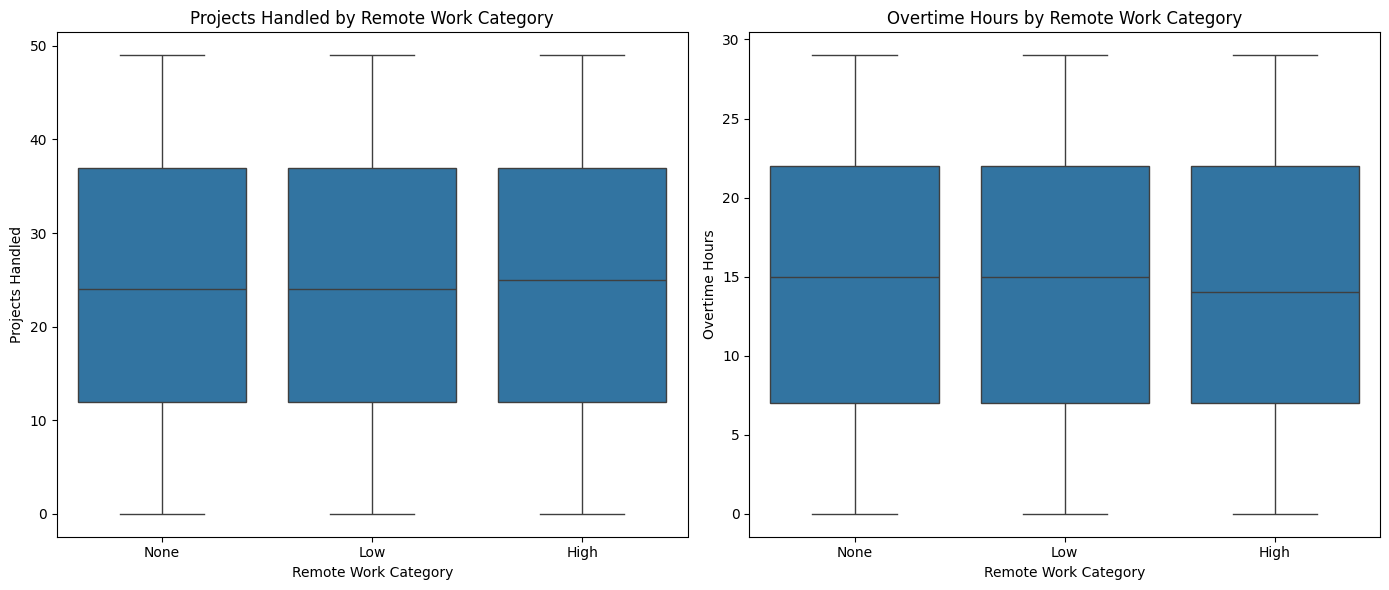

In [ ]:
# Filter data for low performers
low_performers = df[df['Performance_Group'] == 'Low Performer']

# Create boxplots for productivity metrics by Remote_Work_Category
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Projects Handled
sns.boxplot(ax=axes[0], x='Remote_Work_Category', y='Projects_Handled', data=low_performers)
axes[0].set_title('Projects Handled by Remote Work Category')
axes[0].set_xlabel('Remote Work Category')
axes[0].set_ylabel('Projects Handled')

# Boxplot for Overtime Hours
sns.boxplot(ax=axes[1], x='Remote_Work_Category', y='Overtime_Hours', data=low_performers)
axes[1].set_title('Overtime Hours by Remote Work Category')
axes[1].set_xlabel('Remote Work Category')
axes[1].set_ylabel('Overtime Hours')

plt.tight_layout()
plt.show()

Key Observations (from the boxplots):

Projects Handled:

Median values appear consistent across "None," "Low," and "High" remote work categories.
There’s a similar range of variability, indicating remote work might not significantly affect the number of projects handled for low performers.

Overtime Hours:

The median overtime hours are also similar across all categories.
The range and interquartile spread suggest that remote work doesn't strongly influence overtime hours for low performers.


## 3. How does remote work frequency vary across performance categories (high, mid, low), and how does this influence retention?

Retention Analysis Across Performance and Remote Work

**Objective**: Evaluate whether remote work frequency affects retention across performance groups.

**Actions**:
* Analyze resignation rates for each combination of Performance_Group and Remote_Work_Category.
* Build a logistic regression model to predict resignation probability, using Remote_Work_Frequency, Performance_Group, and Employee_Satisfaction_Score as predictors.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare data for logistic regression
X = pd.get_dummies(df[['Remote_Work_Frequency', 'Performance_Group', 'Employee_Satisfaction_Score']], drop_first=True)
y = df['Resigned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.90      1.00      0.95     26969
        True       0.00      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

# Create performance categories
bins = [0, 2, 4, 5]
labels = ['Low Performer', 'Mid Performer', 'High Performer']
df['Performance_Group'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels, include_lowest=True)

# Prepare data for Random Forest
X = pd.get_dummies(df[['Remote_Work_Frequency', 'Performance_Group', 'Employee_Satisfaction_Score']], drop_first=True)
y = df['Resigned']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.85      0.80     26904
        True       0.83      0.72      0.77     27090

    accuracy                           0.78     53994
   macro avg       0.79      0.78      0.78     53994
weighted avg       0.79      0.78      0.78     53994


Confusion Matrix:
[[22764  4140]
 [ 7507 19583]]

Feature Importances:
                            Feature  Importance
1       Employee_Satisfaction_Score    0.992988
0             Remote_Work_Frequency    0.005091
2   Performance_Group_Mid Performer    0.001085
3  Performance_Group_High Performer    0.000837


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

# Create performance categories
bins = [0, 2, 4, 5]
labels = ['Low Performer', 'Mid Performer', 'High Performer']
df['Performance_Group'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels, include_lowest=True)

# Prepare features and target variable
X = pd.get_dummies(df[['Remote_Work_Frequency', 'Performance_Group', 'Employee_Satisfaction_Score']], drop_first=True)
y = df['Resigned']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = gb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance analysis
feature_importances


Classification Report:
              precision    recall  f1-score   support

       False       0.56      0.51      0.53     26904
        True       0.55      0.60      0.58     27090

    accuracy                           0.55     53994
   macro avg       0.55      0.55      0.55     53994
weighted avg       0.55      0.55      0.55     53994


Confusion Matrix:
[[13616 13288]
 [10770 16320]]


,Feature,Importance
1,Employee_Satisfaction_Score,0.992988
0,Remote_Work_Frequency,0.005091
2,Performance_Group_Mid Performer,0.001085
3,Performance_Group_High Performer,0.000837


Retention Analysis (Logistic Regression):
* Model Performance:

  Precision, Recall, and F1-score for employees who resigned (True) are all 0.0.

  Accuracy: 90% overall, but this is driven by the overwhelming majority of employees not resigning (False).

* These indicate that the model did not predict any True values for resignation, leading to undefined metrics for this class.

**Key Issue**: The model struggles because of the severe class imbalance—resigned employees (True) are only 3031 out of 30,000 samples, making up just 10%.

## Address Class Imbalance in Logistic Regression

The imbalance is causing the model to predict only the majority class (False). Use techniques to balance the classes:

* Oversampling: Duplicate samples of the minority class (True).

* Undersampling: Reduce the size of the majority class (False).

* Synthetic Data: Use SMOTE (Synthetic Minority Oversampling Technique).

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Balance the dataset with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.50      0.54      0.52     26904
        True       0.51      0.48      0.49     27090

    accuracy                           0.51     53994
   macro avg       0.51      0.51      0.51     53994
weighted avg       0.51      0.51      0.51     53994



Performance Metrics:

Accuracy: 51% (**close to random guessing due to the balanced dataset**).

Precision and Recall for False: 50% and 54%, respectively.

Precision and Recall for True: 51% and 48%, respectively.

Macro Avg F1-Score: 51%.

**Insights:**
Logistic regression captures some information in the data but struggles to differentiate between resigned (True) and not resigned (False) cases effectively.

This suggests that resignation patterns may not follow a simple linear relationship.